# Covariance Matrices in High Dimensions

### Sang-Yun Oh

# Covariance Matrices

* Suppose data consist of $p$ variables and $n$ measurements
* Variables: blood pressure, height, weight, etc.
* Measurements: $n$-subjects, units, items, etc.
* Data matrix: $\boldsymbol{Y}\in\mathbb{R}^{n\times p}$

## Theoretical Concepts

## Covariance Matrix

* Covariance matrix is defined as
$$
\Sigma=E(\boldsymbol{Y}-\boldsymbol{\mu})(\boldsymbol{Y}-\boldsymbol{\mu})^{\prime}=\left(\sigma_{i j}\right),
$$

* Sample covariance matrix is
$$
\mathbf{S}=\frac{1}{n} \sum_{i=1}^{n}\left(\boldsymbol{Y}_{i}-\overline{\boldsymbol{Y}}\right)\left(\boldsymbol{Y}_{i}-\overline{\boldsymbol{Y}}\right)^{\prime},
$$
* Other types of covariance estimates

## Examples of Covariance Matrices

* Stocks: $p=4300+$ companies and 20 days per month  
    Relationship between stocks (volatility structure)

* Genomics: $p\approx 20000$ genes and 100s of subjects  
    Co-expression of genes (gene relevance network)

* Neuroimaging: $p=90000$ voxels (or hundreds of aggregated ROIs) and thousands of time points  
    Functional connectivity network

* Ecology: $p=23$ environmental variables and $n=12$ locations  
    Community abundance (Warton 2008)
    
**Data are often high dimensional**

## Properties of Covariance Matrices

* Matrix $\Sigma$ is symmetric
* All eigenvalues are nonnegative
* Nonnegative definite
* If singular, dimensionality can be reduced

## Estimation of Covariance Matrices

* High dimensionality makes covariance estimation challenging
* $O(p^2)$ parameters (high estimator variance)
* $\mathbf{S}$ is singular when $p>n$: i.e., some eigenvalues are zeros
* Even when $p<n$, eigenvalues can be inaccurate

## Uses of Covariance Matrices

* Markowitz Portfolio Problem (encodes market volatility)
* Regression (OLS)  
$$
\widehat{\beta}_{\text {OLS}}=\left(\boldsymbol{X}^{\prime} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{\prime} \boldsymbol{Y}
$$
* Canonical Correlation Analysis (CCA): associations among two sets of variables ([examples](https://stats.idre.ucla.edu/r/dae/canonical-correlation-analysis/))
* Input to clustering algorithm
* Inverse of $\Sigma$ often needed but doesn't exist in high dimensional setting

## PCA as Optimal Subspace Estimation

Suppose we have data $X\in \mathbb{R}^{n\times p}$ with mean zero with sample covariance $S=\frac{1}{n-1} X^T X$. Note the following optimization problem
$$
\begin{aligned}
\begin{array}{ll}
\max _{v_1} & v_1^T X^T X v_1, \\
\text{subject to} & v_1^T v_1=1 .
\end{array}
\end{aligned}
$$
Objective function is equivalent to $\operatorname{var}\left(X v_1\right)=v_1^T S v_1$

## PCA as Optimal Subspace Estimation

Suppose we have data $X\in \mathbb{R}^{n\times p}$ with mean zero with sample covariance $S=\frac{1}{n-1} X^T X$. Note the following optimization problem
$$
\begin{aligned}
\begin{array}{ll}
\max _{v_1} & v_1^T X^T X v_1, \\
\text{subject to} & v_1^T v_1=1 .
\end{array}
\end{aligned}
$$
Objective function is equivalent to $\operatorname{var}\left(X v_1\right)=v_1^T S v_1$

Next optimization problem is similar with additional constraints:
$$
\begin{aligned}
\begin{array}{ll}
\max _{v_2} & v_2^T X^T X v_2, \\
\text{subject to} & v_2^T v_2=1 \\
& v_1^T v_2=0.
\end{array}
\end{aligned}
$$


Continuing up to $k$-th PC loadings:
$$\begin{aligned}
\begin{array}{ll}
\max _{v_k} & v_k^T X^T X v_k \\
\text{subject to} & v_k^T v_k=1 \\
& v_j^T v_k=0, j=1, \ldots, k-1
\end{array}
\end{aligned}$$

Collectively, we can write
$$
\begin{aligned}
\begin{array}{ll}
\max_V & V^T X^T X V \\
\text{subject to} & V^T V=I
\end{array}
\end{aligned}
$$

For other formulation of PCA refer to _Principal Component Analysis and Optimization:
A Tutorial_, Reris and Brooks ([manuscript](https://scholarscompass.vcu.edu/cgi/viewcontent.cgi?article=1006&context=ssor_pubs))

## Regularization

* Eigenvalue structure (Ledoit-Wolf, condition number)

* Sparsity pattern (graphical models)

* Structural assumptions (banding, tapering, low-rank)

All stabilize estimates (bias variance trade off)

## Eigen-structure regularization

* Ledoit-Wolf Estimator (Ledoit and Wolf, 2004)
$$
\widehat{\mathbf{\Sigma}}=\alpha I+(1-\alpha) \mathbf{S}
$$

* Condition number regularization (Won et al., 2009)
$$
\begin{array}{ll}
\operatorname{maximize} & l(\Sigma) \\
\text { subject to } & \operatorname{cond}(\Sigma) \leq \kappa_{\max },
\end{array}
$$  
    where $l(\Sigma)$ is the Gaussian Likelihood

* Eigenvector regularization (sparse PCA, SVD, etc)

- Ridge regression: $\min_\beta \|Y - X\beta\|^2 +\gamma\|\beta\|_2^2$
$$
\widehat{\beta}_{\text {Ridge}}=\left({X}^{\prime} {X} + \gamma I\right)^{-1} {X}^{\prime} {Y}
$$

## Sparsity pattern (Graphical Model)

* $\mathbf{\Theta}=\mathbf{\Sigma}^{-1}$ appear in many situations
* $\mathbf{\Theta}$ can be regularized directly

* Assume $\boldsymbol{Y}_{1}, \ldots, \boldsymbol{Y}_{n} \sim N_{p}(\boldsymbol{0}, \boldsymbol{\Sigma})$ and 
$$
L(\boldsymbol{\Sigma})=\frac{1}{(2 \pi)^{n p / 2}|\boldsymbol{\Sigma}|^{n / 2}} \exp \left\{-\frac{1}{2} \sum_{i=1}^{n} \boldsymbol{Y}_{i}^{\prime} \boldsymbol{\Sigma}^{-1} \boldsymbol{Y}_{i}\right\} .
$$

* Compute $\boldsymbol{\Theta}$:
$$
\ell_{P}(\boldsymbol{\Theta})=\log |\boldsymbol{\Theta}|-\operatorname{tr}(\mathbf{S} \Theta)-\lambda\|\boldsymbol{\Theta}\|_{1},
$$

Reference: [High‐Dimensional Covariance Estimation](https://ucsb-primo.hosted.exlibrisgroup.com/permalink/f/1egv95m/01UCSB_ALMA51276966020003776) by Mohsen Pourahmadi

# Numerical Experiments

## Sample Covariance Matrix

$$
\mathbf{S}=\frac{1}{n} \sum_{i=1}^{n}\left(\boldsymbol{Y}_{i}-\overline{\boldsymbol{Y}}\right)\left(\boldsymbol{Y}_{i}-\overline{\boldsymbol{Y}}\right)^{\prime},
$$

* MLE of covariance matrix for Gaussian data
* Singular in high dimensional setting: Zero eigenvalues 
* When $p>n$, other covariance estimates are needed

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


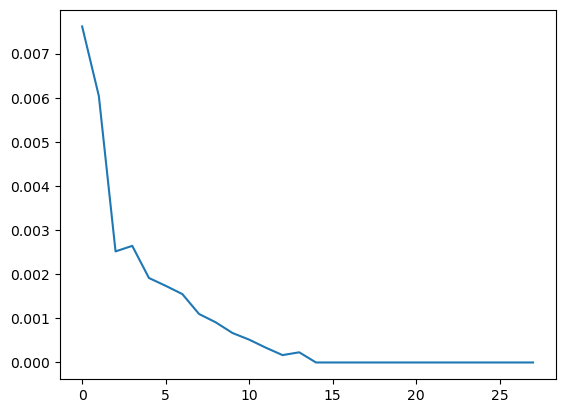

In [1]:
import pandas as pd
logret = pd.read_pickle('dowjones-logreturns.pkl').dropna()

import sklearn.covariance as skcov
import sklearn.model_selection as sksel
import numpy.linalg as npl

cov_sample = skcov.empirical_covariance(logret[:15])
eigval_sample, eigvec_sample = npl.eig(cov_sample)
pd.Series(eigval_sample).plot();

## Ledoit-Wolf Estimator 
$$
\Sigma_{\text {LW}}=(1-\alpha) \mathbf{S}+\alpha \frac{\operatorname{Tr} \mathbf{S}}{p} \text { I }
$$

* Ledoit and Wolf, 2004 ([documentation page](https://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance))
* Weighted average between sample covariance and identity (times average eigenvalue)

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


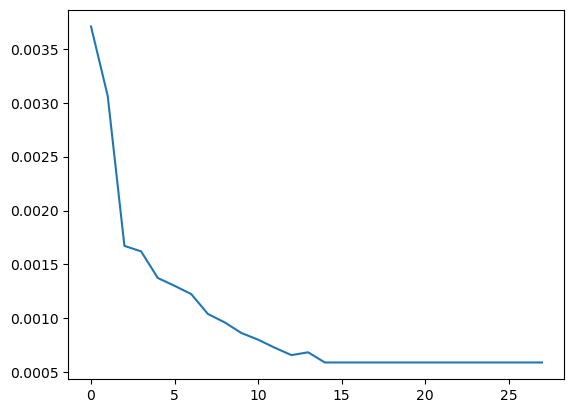

In [2]:
cov_lw, shrinkage_lw = skcov.ledoit_wolf(logret[:15])
eigval_lw, eigvec_lw = npl.eig(cov_lw)
pd.Series(eigval_lw).plot();

* Large eigenvalues decrease
* Zero eigenvalues increase (not sigular) 

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


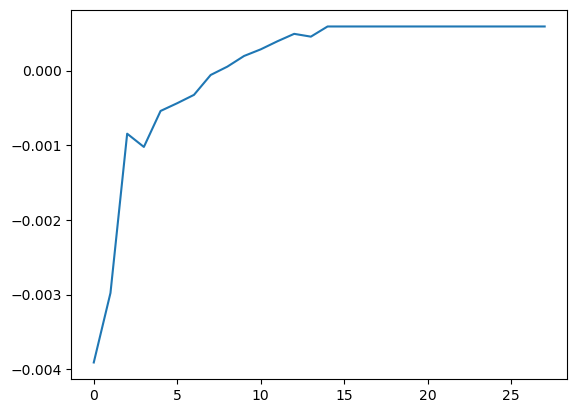

In [3]:
pd.Series(eigval_lw - eigval_sample).plot();

## Graphical Model

* Suppose $X = (X_a, X_b, X_c)^T \sim N(0, \Sigma)$ then,
* $\Omega= \Sigma^{-1}$ encodes multivariate relationship (rather than pairwise)
$$
\operatorname{cor}\left(X_{a}, X_{b} \mid X_{c}: c \neq a, b\right)=\frac{\operatorname{cov}\left(X_{a}, X_{b} \mid X_{c}: c \neq a, b\right)}{\sqrt{\operatorname{var}\left(X_{a} \mid X_{c}: c \neq a, b\right) \operatorname{var}\left(X_{b} \mid X_{c}: c \neq a, b\right)}}\\
=\frac{-\Omega_{a b}}{\sqrt{\Omega_{a a} \Omega_{b b}}}
$$
* $\Omega$ is useful for understanding relationships

In [4]:
edge_model = skcov.GraphicalLassoCV(n_refinements=2)
edge_model.fit(logret[:100])
omega = edge_model.precision_.copy()
cov_ggm = npl.inv(omega)
eigval_ggm, eigvec_ggm = npl.eig(cov_ggm)

/opt/conda/lib/python3.11/site-packages/sklearn/covariance/_graph_lasso.py:159: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
/opt/conda/lib/python3.11/site-packages/sklearn/covariance/_graph_lasso.py:160: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


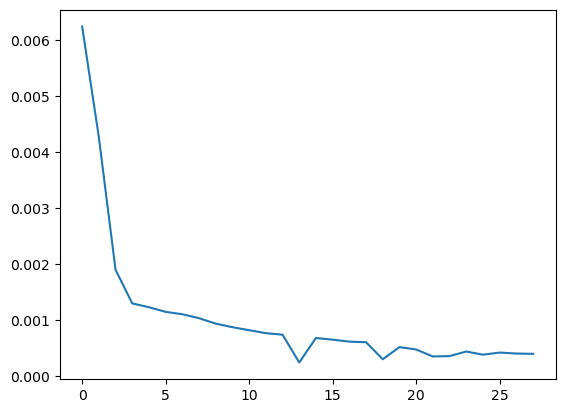

In [5]:
pd.Series(eigval_ggm).plot();

### Visualize Graphical Model

In [6]:
!pip install bokeh==2.4.1
!pip install networkx

In [7]:
from bokeh.io import show, output_file, output_notebook
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, 
                          HoverTool, MultiLine, NodesAndLinkedEdges, 
                          Plot, Range1d, TapTool, LabelSet, 
                          ColumnDataSource)
from bokeh.plotting import from_networkx
from bokeh.palettes import Spectral4
output_notebook()

import networkx as nx
G = nx.from_pandas_adjacency(pd.DataFrame(omega, columns=logret.columns.to_list(), index=logret.columns.to_list()))

Loading BokehJS ...

In [8]:
plot = Plot(plot_width=600, plot_height=600,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Dow Jones Component Stock Graphical Models"

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())
plot.renderers.append(graph_renderer)

# add labels
pos = nx.circular_layout(G)
x, y=zip(*pos.values())

source = ColumnDataSource({'x':x,'y':y,'ticker':logret.columns.to_list()})
labels = LabelSet(x='x', y='y', text='ticker', source=source)

plot.renderers.append(labels)

show(plot)

## Compare Eigenvalues

* Different estimates perform different regularization
* There are similairies as well as differences

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


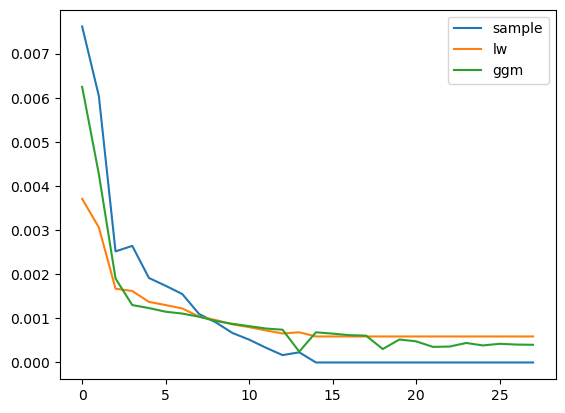

In [9]:
import numpy as np
allevals = pd.DataFrame({
    "sample": np.real(eigval_sample),
    "lw": eigval_lw,
    "ggm": eigval_ggm
})
allevals.plot();